# Social Network Analysis @ UNIPI
### 10/06/2022

In [56]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# First Half

## Exercise 1: Synthetic Models [4 points]

Let G be a BA graph with N = 56200 and m = 3
- How many edges does G have?
- What fraction of edges is incident on the largest hub?
-What’s the value of the p parameter of the comparable ER graph? What’s
its regime?

In [57]:
n = 56200
m = 3

In [58]:
e = m*n
e

168600

In [59]:
kmax = m * n**(1/2)
kmax

711.1961754677819

In [60]:
ratio = kmax/e
ratio

0.004218245406095978

In [61]:
e_tot = n*(n-1)/2
p = e/e_tot
p

0.0001067634655420915

Supercritical regime

In [62]:
p < 1/n, p == 1/n, p > 1/n, p > np.log(n)/n

(False, False, True, False)

## Exercise 2: Graph Construction [6 points]

Given 12 nodes - identified with letters - and, at most, 24 edges build a
graph such that all the following conditions hold:
- The graph is composed by exactly two separated components;
- There exist a path of length 6 between A and B;
- The clustering coefficient of C and D is, respectively, $\frac{1}{3}$ and $\frac{1}{2}$;
- Node E has the lowest degree centrality;
- Node F has the highest Closeness Centrality (in its component);
- Edge (A, I) has the lowest betweenness centrality (in its component).

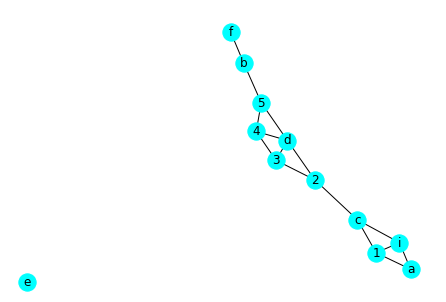

In [63]:
g = nx.Graph()
g.add_edge('a', 'i')
g.add_edge('a', '1')
g.add_edge('1', 'i')
g.add_edge('c', 'i')
g.add_edge('c', '1')
g.add_edge('c', '2')
g.add_edge('2', 'd')
g.add_edge('2', '3')
g.add_edge('3', 'd')
g.add_edge('3', '4')
g.add_edge('4', 'd')
g.add_edge('4', '5')
g.add_edge('d', '5')
g.add_edge('5', 'b')
g.add_edge('b', 'f')
g.add_node("e")

nx.draw(g, with_labels = True, node_color='cyan')

In [64]:
nx.clustering(g, "c")

0.3333333333333333

In [65]:
nx.clustering(g, "d")

0.5

In [66]:
nx.centrality.closeness_centrality(g)

{'a': 0.23923444976076552,
 'i': 0.303030303030303,
 '1': 0.303030303030303,
 'c': 0.3787878787878788,
 '2': 0.43290043290043284,
 'd': 0.43290043290043284,
 '3': 0.3787878787878788,
 '4': 0.34965034965034963,
 '5': 0.36363636363636365,
 'b': 0.28409090909090906,
 'f': 0.22172949002217293,
 'e': 0.0}

In [67]:
nx.centrality.edge_betweenness_centrality(g)

{('a', 'i'): 0.07575757575757576,
 ('a', '1'): 0.07575757575757576,
 ('i', '1'): 0.015151515151515152,
 ('i', 'c'): 0.18181818181818182,
 ('1', 'c'): 0.18181818181818182,
 ('c', '2'): 0.42424242424242425,
 ('2', 'd'): 0.34090909090909094,
 ('2', '3'): 0.11363636363636365,
 ('d', '3'): 0.03787878787878788,
 ('d', '4'): 0.05303030303030303,
 ('d', '5'): 0.29545454545454547,
 ('3', '4'): 0.07575757575757576,
 ('4', '5'): 0.06818181818181818,
 ('5', 'b'): 0.2727272727272727,
 ('b', 'f'): 0.15151515151515152}

## Exercise 3: Graph Analysis [6 points]

Given the (weighted) graph G:
- Compute its diameter;
- List all the shortest paths among the pairs (A,D), (C,G) and (A,E) Hint: it’s a weighted graph.
- Compute the closeness centrality of A, D and C;
- Compute the clustering coefficient of A, E and D;
- Write its adjacency matrix;
- Verify the presence of Eulerean and Hamiltonian cycles.

In [68]:
g = nx.Graph()
g.add_edge("a","b", weight=5)
g.add_edge("a","c", weight=3)
g.add_edge("b","c", weight=4)
g.add_edge("b","d", weight=6)
g.add_edge("b","e", weight=2)
g.add_edge("c","d", weight=5)
g.add_edge("c","f", weight=6)
g.add_edge("d","e", weight=6)
g.add_edge("d","f", weight=6)
g.add_edge("e","f", weight=3)
g.add_edge("e","g", weight=5)
g.add_edge("f","g", weight=4)

In [69]:
nx.diameter(g)

3

In [70]:
nx.shortest_path(g, "a", "d", weight='weight')

['a', 'c', 'd']

In [71]:
nx.shortest_path(g, "c", "g", weight='weight')

['c', 'f', 'g']

In [72]:
nx.shortest_path(g, "a", "e", weight='weight')

['a', 'b', 'e']

In [73]:
nx.clustering(g, "a")

1.0

In [74]:
nx.clustering(g, "e")

0.5

In [75]:
nx.clustering(g, "d")

0.6666666666666666

In [76]:
nx.closeness_centrality(g, "a", wf_improved=False), nx.closeness_centrality(g, "c", wf_improved=False), nx.closeness_centrality(g, "d", wf_improved=False)

(0.5454545454545454, 0.75, 0.75)

In [77]:
mat = nx.adjacency_matrix(g)
mat.todense()

matrix([[0, 5, 3, 0, 0, 0, 0],
        [5, 0, 4, 6, 2, 0, 0],
        [3, 4, 0, 5, 0, 6, 0],
        [0, 6, 5, 0, 6, 6, 0],
        [0, 2, 0, 6, 0, 3, 5],
        [0, 0, 6, 6, 3, 0, 4],
        [0, 0, 0, 0, 5, 4, 0]])

# Second Half

## Exercise 1: Network Resilience [4 points]
Given the graph G shown in Figure 1(a) remove 5 nodes, one at a time, applying
the following selection criteria:
- random selection;
- decreasing degree centrality;

Repeat the same procedure removing the edges by:
- Decreasing weight;
- Increasing weight;

Specify at each iteration the id of the removed node: of multiple nodes generate the same score solve the tie removing the one with the lowest identifier
(alphabetical order). 

Compare how each removal impacts on the graph structure in terms of number of connected components and average component size
(visualize their trends).

In [78]:
def avg_size(g1):
    res = []
    cmps = nx.connected_components(g1)
    for c in cmps:
        res.append(len(c))
    return np.mean(res)

In [79]:
import copy

g1 = copy.deepcopy(g)
for i in range(5):
    degs = nx.centrality.degree_centrality(g1)
    node = max(degs, key=degs.get)
    g1.remove_node(node)
    print(i, node, nx.number_connected_components(g1), avg_size(g1))

0 b 1 6.0
1 f 1 5.0
2 c 2 2.0
3 e 3 1.0
4 a 2 1.0


In [80]:
eds = list(g.edges(data=True))

In [81]:
eds = [(i[0], i[1], i[2]['weight']) for i in eds]
eds = sorted(eds, key = lambda x: x[2])

In [82]:
g1 = copy.deepcopy(g)
for i in range(5):
    g1.remove_edge(u=eds[i][0], v=eds[i][1])
    print(i, eds[i], nx.number_connected_components(g1), avg_size(g1))

0 ('b', 'e', 2) 1 7.0
1 ('a', 'c', 3) 1 7.0
2 ('e', 'f', 3) 1 7.0
3 ('b', 'c', 4) 1 7.0
4 ('f', 'g', 4) 1 7.0


In [83]:
g1 = copy.deepcopy(g)
eds = sorted(eds, key = lambda x: -x[2])
for i in range(5):
    g1.remove_edge(u=eds[-(i+1)][0], v=eds[-(i+1)][1])
    print(i, eds[i], nx.number_connected_components(g1), avg_size(g1))

0 ('b', 'd', 6) 1 7.0
1 ('c', 'f', 6) 1 7.0
2 ('d', 'e', 6) 1 7.0
3 ('d', 'f', 6) 1 7.0
4 ('a', 'b', 5) 1 7.0


## Exercise 2: Community Evaluation [4 points]
Given the Graph G in Figure 1(a) compare the following partitions:
- P1 [A,B,C,D], [E,F,G]
- P2 [A,B,C,D,E], [F,G]
- P3 [A], [B,C,D,E,F], [G]

Which partition is the best with respect to average node degree (AND)? and for internal edge density (IED)?

In [84]:
def ied(graph, community):
    sg = nx.subgraph(graph, community)
    ec = sg.number_of_edges()
    vc = sg.number_of_nodes()
    try:
        return (2*ec)/(vc*(vc-1))
    except:
        return 0

In [85]:
P1 = [['a','b','c','d'], ['e','f','g']]
P2 = [['a','b','c','d','e'],['f','g']]
P3 = [['a'],['b','c','d','e','f'],['g']]

In [86]:
f"P1 - C1: {ied(g, P1[0])} C2: {ied(g, P1[1])}"

'P1 - C1: 0.8333333333333334 C2: 1.0'

In [87]:
f"P2 - C1: {ied(g, P2[0])} C2: {ied(g, P2[1])}"

'P2 - C1: 0.7 C2: 1.0'

In [88]:
f"P3 - C1: {ied(g, P3[0])} C2: {ied(g, P3[1])} C3: {ied(g, P3[1])}"

'P3 - C1: 0 C2: 0.8 C3: 0.8'

In [89]:
max([0.83, 0.7, 0])

0.83

In [90]:
def AND(graph, community):
    sg = nx.subgraph(graph, community)
    degs = [i[1] for i in nx.degree(sg)]    
    vc = sg.number_of_nodes()
    try:
        return sum(degs)/vc
    except:
        return 0

In [91]:
f"P1 - C1: {AND(g, P1[0])} C2: {AND(g, P1[1])}"

'P1 - C1: 2.5 C2: 2.0'

In [92]:
f"P2 - C1: {AND(g, P2[0])} C2: {AND(g, P2[1])}"

'P2 - C1: 2.8 C2: 1.0'

In [93]:
f"P3 - C1: {AND(g, P3[0])} C2: {AND(g, P3[1])} C3: {AND(g, P3[1])}"

'P3 - C1: 0.0 C2: 3.2 C3: 3.2'

In [94]:
max([2.0, 1, 0])

2.0

## Exercise 3: Hypergraphs [4 points]
Given the hypergraph H:
- compute its incidence and adjacency matrixes;
- visualize its dual;
- visualize its left and right projections;
- visualize its 2-line graph;
- does it contains any 2-walk? if so list them. If not, define an s-walk

In [95]:
import hypernetx as hnx

In [96]:
hed = {
    'A': (1,2,3,9),
    'B': (7,8),
    'C': (3,6),
    'D': (8,7),
    'E': (5,6),
    'F': (1,2,3,9),
    'G': (2,3,4,5),
    'H': (4,5)
}

H = hnx.Hypergraph(hed)

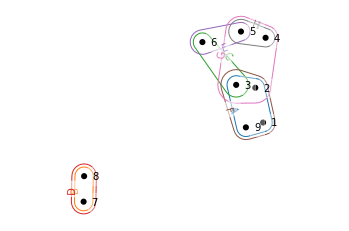

In [97]:
hnx.draw(H)

In [98]:
M_incidence = H.incidence_matrix()
M_incidence.toarray()

array([[1, 0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 1, 0, 0, 0, 0]])

In [99]:
M_aux1 = H.auxiliary_matrix(s=1)
M_aux1.toarray()

array([[0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 1],
       [1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 0, 0, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [1, 0, 1, 1, 1, 1, 0, 0]])

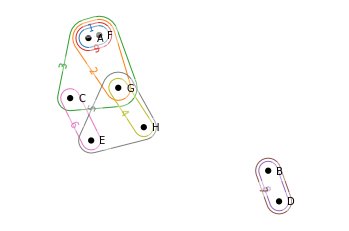

In [100]:
HD = H.dual()
hnx.draw(HD)

In [101]:
bi = H.bipartite()
nx.is_bipartite(bi)

True

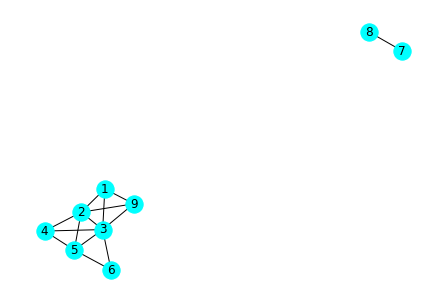

In [102]:
left = nx.projected_graph(bi, [1,2,3,4,5,6,7,8,9])
nx.draw(left, with_labels = True, node_color='cyan')

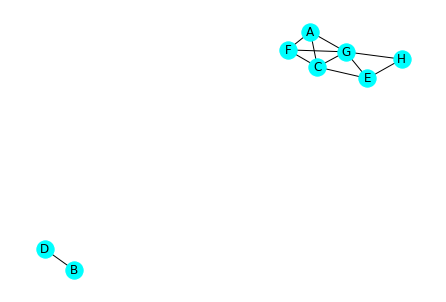

In [103]:
right = nx.projected_graph(bi, ['A','B','C','D','E','F','G','H'])
nx.draw(right, with_labels = True, node_color='cyan')

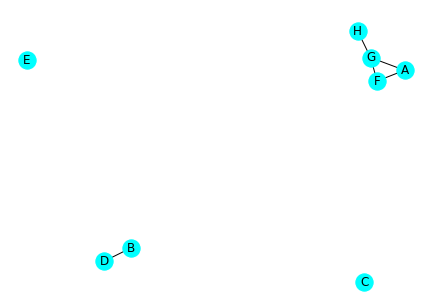

In [104]:
i = 2
A = dict()
g = dict()

A[i],names = H.edge_adjacency_matrix(s=i,index=True)
A[i] = A[i].todense()
g[i] = nx.from_numpy_matrix(A[i])  ## corresponding line graph
nx.relabel.relabel_nodes(g[i],names,copy=False)
nx.draw(g[i], with_labels=True, node_color='cyan');

By definition all edges in a 2-line graphs describes 2-walks, i.e. paths in which adjacent hyperedges share at least 2 nodes.

## Exercise 4: Open Questions [4 points]
- Q1: Describe (at a high level) the steps of the Louvain algorithm and its rationale.
- Q2: Describe the Algoritmic bias model (its formulation, rationale and assumptions). Discus the effects of the  and γ parameters on simulation outcomes and execution times.

Answers on the (Q1) Community Discovery and (Q2) Opinion Dynamics slide decks